In [1]:
pip install jupyter pandas numpy scikit-learn nltk matplotlib seaborn 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import os
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 
plt.style.use('seaborn-v0_8') 
sns.set_palette("husl") 
print("📊 Sentiment Analysis Project - Data Exploration") 
print("=" * 50) 

📊 Sentiment Analysis Project - Data Exploration


In [3]:
# Load the dataset 
df = pd.read_csv('C:\\Users\\asnab\\Desktop\\IMDB_Dataset.csv') 
# Basic information 
print(f"📈 Dataset Shape: {df.shape}")
print(f"📋 Columns: {df.columns.tolist()}") 
print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB") 
print("\n" + "="*30) 
# Display first few rows
print("🔍 First 5 rows:") 
display(df.head()) 
# Check for missing values 
print(f"\n❓ Missing Values:") 
print(df.isnull().sum()) 

📈 Dataset Shape: (50000, 2)
📋 Columns: ['review', 'sentiment']
💾 Memory Usage: 67.66 MB

🔍 First 5 rows:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive



❓ Missing Values:
review       0
sentiment    0
dtype: int64


📊 Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


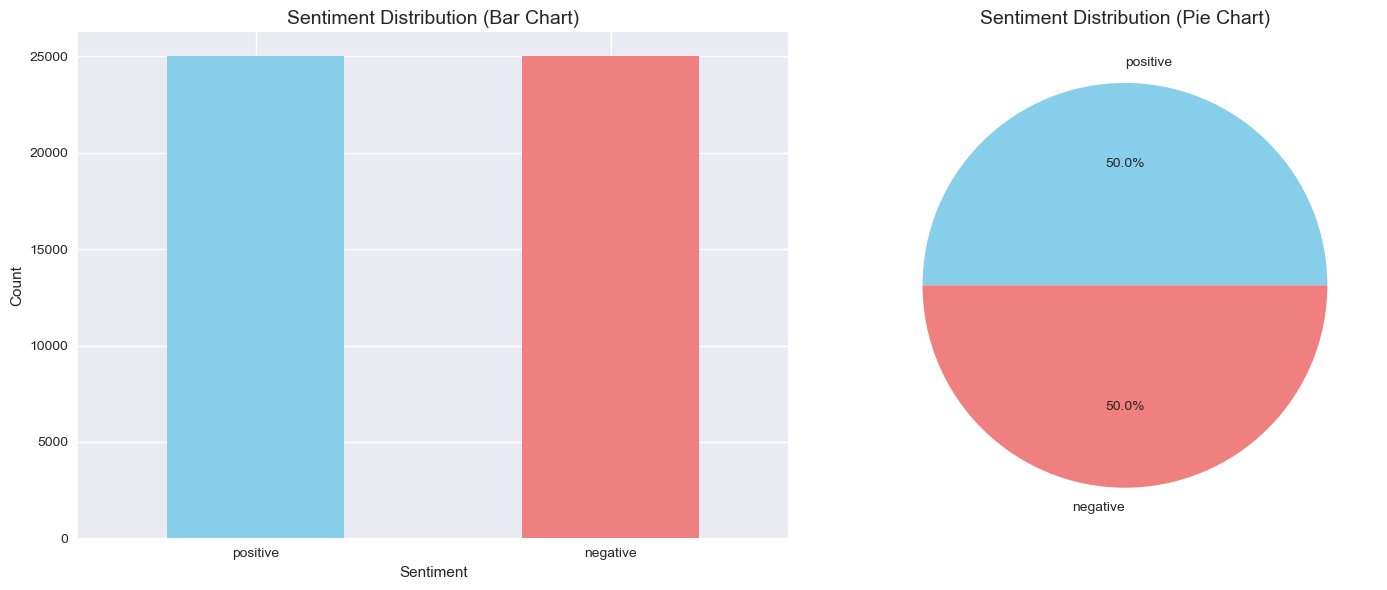

In [4]:
sentiment_counts = df['sentiment'].value_counts() 
print("📊 Sentiment Distribution:") 
print(sentiment_counts) 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sentiment_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral']) 
ax1.set_title('Sentiment Distribution (Bar Chart)', fontsize=14) 
ax1.set_xlabel('Sentiment') 
ax1.set_ylabel('Count') 
ax1.tick_params(axis='x', rotation=0)
ax2.pie(sentiment_counts.values, labels=sentiment_counts.index, 
autopct='%1.1f%%',  
colors=['skyblue', 'lightcoral']) 
ax2.set_title('Sentiment Distribution (Pie Chart)', fontsize=14) 
plt.tight_layout() 
plt.show() 

📏 Text Length Statistics by Sentiment:


review_length                                                        \
                  count        mean          std   min    25%    50%      75%   
sentiment                                                                       
negative        25000.0  1294.06436   945.892669  32.0  706.0  973.0  1567.25   
positive        25000.0  1324.79768  1031.492627  65.0  691.0  968.0  1614.00   

                   word_count                                             \
               max      count       mean         std   min    25%    50%   
sentiment                                                                  
negative    8969.0    25000.0  229.46456  164.947795   4.0  128.0  174.0   
positive   13704.0    25000.0  232.84932  177.497046  10.0  125.0  172.0   

                          
             75%     max  
sentiment                 
negative   278.0  1522.0  
positive   284.0  2470.0

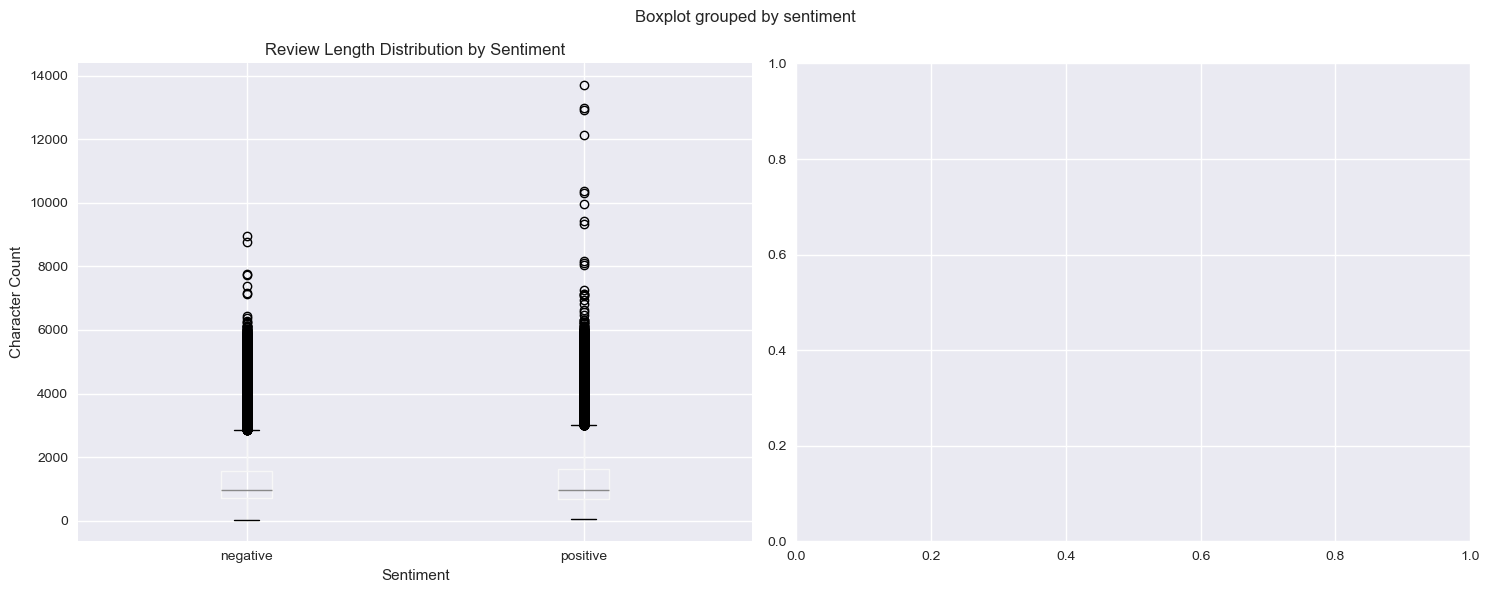

In [5]:
df['review_length'] = df['review'].str.len() 
df['word_count'] = df['review'].str.split().str.len() 
print("📏 Text Length Statistics by Sentiment:") 
length_stats = df.groupby('sentiment')[['review_length', 
'word_count']].describe() 
display(length_stats) 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
df.boxplot(column='review_length', by='sentiment', ax=ax1) 
ax1.set_title('Review Length Distribution by Sentiment') 
ax1.set_xlabel('Sentiment') 
ax1.set_ylabel('Character Count')
plt.tight_layout() 
plt.show() 

In [6]:
print("✅ Sample Positive Reviews:") 
print("-" * 50) 
for i, review in enumerate(df[df['sentiment'] == 'positive']['review'].head(3), 1): 
    print(f"{i}. {review[:200]}...") 
print()  
print("❌ Sample Negative Reviews:") 
print("-" * 50) 
for i, review in enumerate(df[df['sentiment'] == 'negative']['review'].head(3), 1): 
    print(f"{i}.{review[:200]}...") 
print() 

✅ Sample Positive Reviews:
--------------------------------------------------
1. One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo...
2. A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece...
3. I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is wi...

❌ Sample Negative Reviews:
--------------------------------------------------
1.Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, J...
2.This show was 

In [7]:
import pandas as pd 
import numpy as np 
import re
import seaborn as sns 
import warnings 
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8') 
sns.set_palette("husl") 
print("📊 Sentiment Analysis Project - Data Exploration") 
print("=" * 50)

📊 Sentiment Analysis Project - Data Exploration


In [9]:
df = pd.read_csv('C:\\Users\\asnab\\Desktop\\IMDB_Dataset.csv') 
print(f"📈 Dataset Shape: {df.shape}") 
print(f"📋 Columns: {df.columns.tolist()}") 
print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB") 
print("\n" + "="*30)
print("🔍 First 5 rows:") 
display(df.head()) 
print(f"\n❓ Missing Values:") 
print(df.isnull().sum()) 

📈 Dataset Shape: (50000, 2)
📋 Columns: ['review', 'sentiment']
💾 Memory Usage: 67.66 MB

🔍 First 5 rows:


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive



❓ Missing Values:
review       0
sentiment    0
dtype: int64


📊 Sentiment Distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


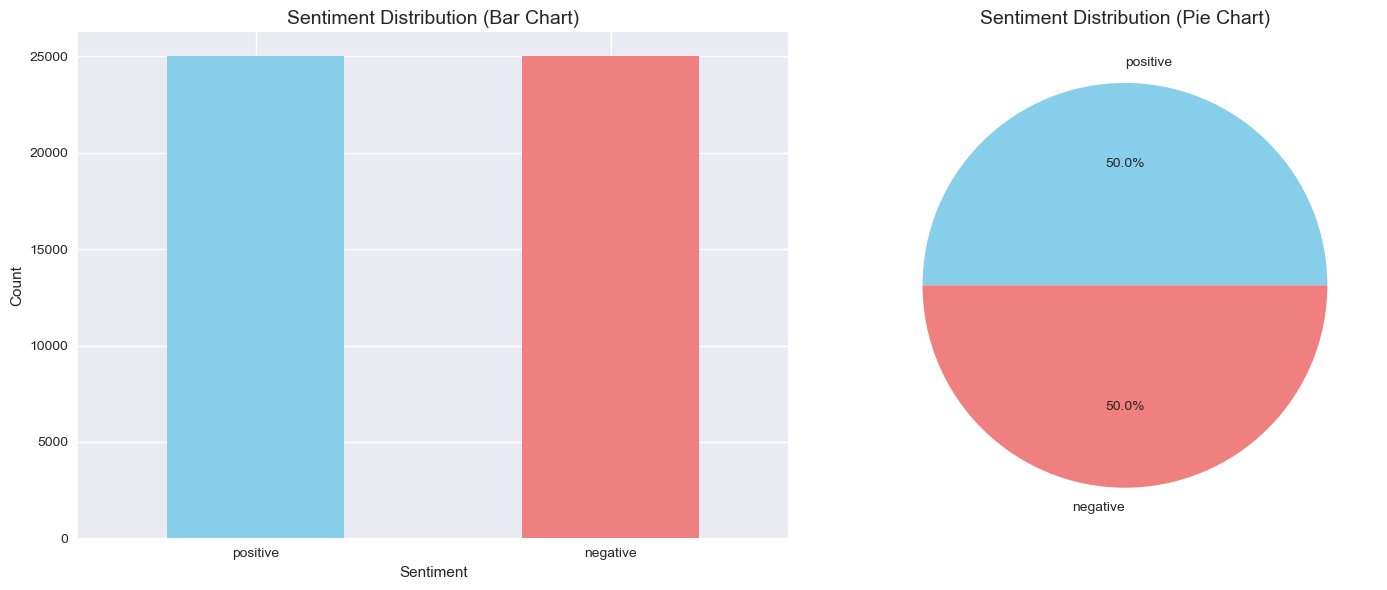

In [10]:
sentiment_counts = df['sentiment'].value_counts() 
print("📊 Sentiment Distribution:") 
print(sentiment_counts) 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  
sentiment_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral']) 
ax1.set_title('Sentiment Distribution (Bar Chart)', fontsize=14) 
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Count') 
ax1.tick_params(axis='x', rotation=0) 
ax2.pie(sentiment_counts.values, labels=sentiment_counts.index, 
autopct='%1.1f%%',  
colors=['skyblue', 'lightcoral']) 
ax2.set_title('Sentiment Distribution (Pie Chart)', fontsize=14) 
plt.tight_layout() 
plt.show()

📏 Text Length Statistics by Sentiment:


review_length                                                        \
                  count        mean          std   min    25%    50%      75%   
sentiment                                                                       
negative        25000.0  1294.06436   945.892669  32.0  706.0  973.0  1567.25   
positive        25000.0  1324.79768  1031.492627  65.0  691.0  968.0  1614.00   

                   word_count                                             \
               max      count       mean         std   min    25%    50%   
sentiment                                                                  
negative    8969.0    25000.0  229.46456  164.947795   4.0  128.0  174.0   
positive   13704.0    25000.0  232.84932  177.497046  10.0  125.0  172.0   

                          
             75%     max  
sentiment                 
negative   278.0  1522.0  
positive   284.0  2470.0

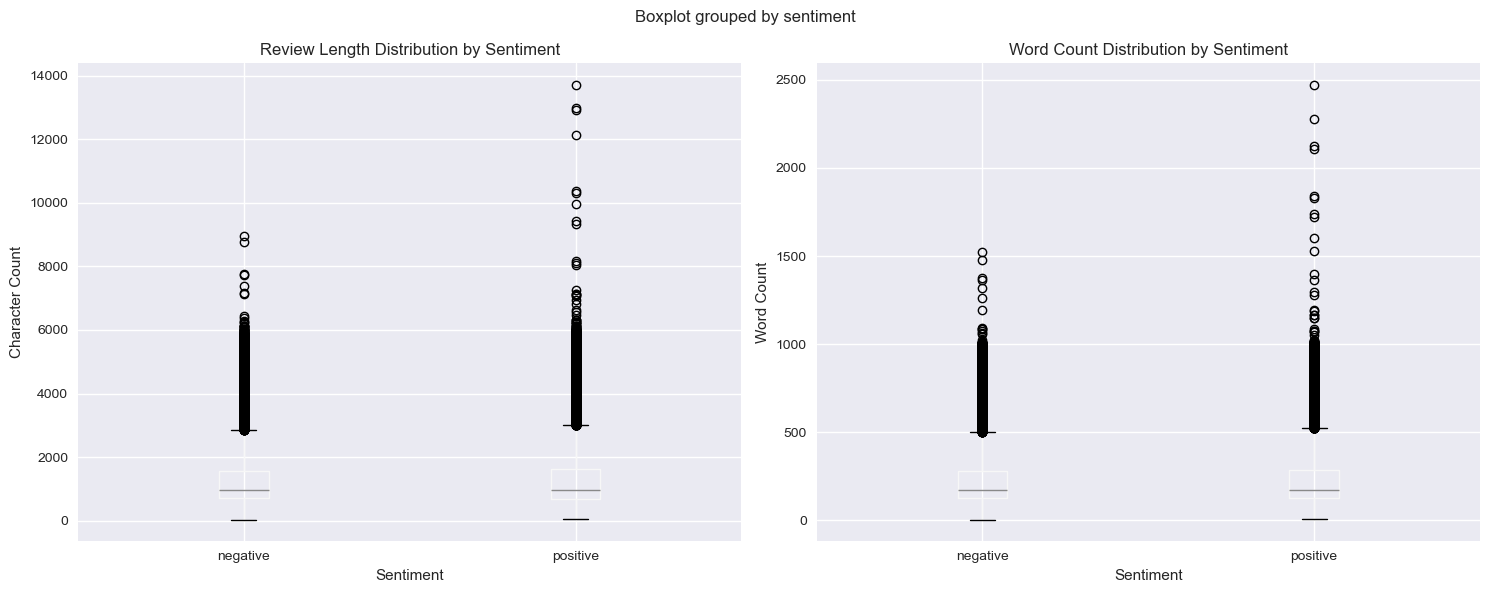

In [11]:
df['review_length'] = df['review'].str.len() 
df['word_count'] = df['review'].str.split().str.len() 
print("📏 Text Length Statistics by Sentiment:") 
length_stats = df.groupby('sentiment')[['review_length', 'word_count']].describe() 
display(length_stats) 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6)) 
df.boxplot(column='review_length', by='sentiment', ax=ax1) 
ax1.set_title('Review Length Distribution by Sentiment') 
ax1.set_xlabel('Sentiment') 
ax1.set_ylabel('Character Count') 
df.boxplot(column='word_count', by='sentiment', ax=ax2) 
ax2.set_title('Word Count Distribution by Sentiment') 
ax2.set_xlabel('Sentiment') 
ax2.set_ylabel('Word Count') 
plt.tight_layout() 
plt.show()

In [12]:
print("✅ Sample Positive Reviews:") 
print("-" * 50) 
for i, review in enumerate(df[df['sentiment'] == 'positive']['review'].head(3), 1): 
    print(f"{i}. {review[:200]}...") 
print() 
print("❌ Sample Negative Reviews:") 
print("-" * 50) 
for i, review in enumerate(df[df['sentiment'] == 'negative']['review'].head(3), 1): 
    print(f"{i}. {review[:200]}...") 
print() 

✅ Sample Positive Reviews:
--------------------------------------------------
1. One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me abo...
2. A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece...
3. I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is wi...

❌ Sample Negative Reviews:
--------------------------------------------------
1. Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, J...
2. This show wa

In [13]:
import re
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords once
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Basic cleaning: remove punctuation, lowercase
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.strip()
    return text

# Advanced: remove stopwords, extra spaces, etc.
def advanced_preprocess(text):
    text = clean_text(text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asnab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Apply preprocessing to all reviews 
print("🔄 Preprocessing all reviews...") 

df['cleaned_review'] = df['review'].apply(clean_text) 
df['processed_review'] = df['review'].apply(advanced_preprocess) 

# Compare original vs processed lengths 
df['original_length'] = df['review'].str.len() 
df['processed_length'] = df['processed_review'].str.len() 

print("📊 Preprocessing Impact:") 
print(f"Average original length: {df['original_length'].mean():.0f}characters") 
print(f"Average processed length: {df['processed_length'].mean():.0f} characters") 
print(f"Reduction: {((df['original_length'].mean() - 
df['processed_length'].mean()) / df['original_length'].mean() * 100):.1f}%") 

# Show examples 
display(df[['review', 'cleaned_review', 'processed_review']].head(3)) 

🔄 Preprocessing all reviews...
📊 Preprocessing Impact:
Average original length: 1309characters
Average processed length: 842 characters
Reduction: 35.7%


,review,cleaned_review,processed_review
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,a wonderful little production br br the filmin...,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
